<a href="https://colab.research.google.com/github/ombhosale9172/Stock-Price-Prediction-Using-LSTM-and-Sentiment-Analysis/blob/main/Stock_price_hybrid_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import os

username = "YOUR_KAGGLE_USERNAME"
key = "YOUR_KAGGLE_KEY"   # Kaggle API token

os.makedirs("/root/.kaggle", exist_ok=True)

with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump({"username": username, "key": key}, f)

!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
# https://www.kaggle.com/datasets/equinxx/stock-tweets-for-sentiment-analysis-and-prediction
!kaggle datasets download -d equinxx/stock-tweets-for-sentiment-analysis-and-prediction

In [ ]:
!kaggle datasets download -d jacksoncrow/stock-market-dataset

In [ ]:
!unzip stock-tweets-for-sentiment-analysis-and-prediction.zip

In [ ]:
!unzip /content/stock-market-dataset.zip

In [ ]:
import pandas as pd
df = pd.read_csv("/content/stock_yfinance_data.csv")

In [ ]:
df_sentiment = pd.read_csv('stock_tweets.csv')
display(df_sentiment.head())

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [ ]:
#  showing top 5 rows of stock dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [ ]:
#dataset information
df_sentiment.info()

#describe
print(df_sentiment.describe())

#duplicates
df_sentiment.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          80793 non-null  object
 1   Tweet         80793 non-null  object
 2   Stock Name    80793 non-null  object
 3   Company Name  80793 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB
                             Date                         Tweet Stock Name  \
count                       80793                         80793      80793   
unique                      64424                         64479         25   
top     2022-04-15 14:15:26+00:00  $TSLA will triple in 2022 🚀🌕       TSLA   
freq                           14                            25      37422   

       Company Name  
count         80793  
unique           25  
top     Tesla, Inc.  
freq          37422  


np.int64(0)

In [ ]:
#shape of dataset
rows = df_sentiment.shape[0]
print(f'total number of rows:{rows}')
col =df_sentiment.shape[1]
print(f'total number of columns:{col}')

total number of rows:80793
total number of columns:4


In [ ]:

#missing value in sentiment dataset
missing_value  = df_sentiment.isnull().sum()
if missing_value.sum() > 1:
     print('missing values are present in dataset')
else:
     print('no missing values present in dataset')

no missing values present in dataset


In [ ]:
stock_name= 'AMZN'
df_sentiment = df_sentiment[df_sentiment['Stock Name'] == stock_name]
print(df.shape)

(6300, 8)


In [ ]:
df_sentiment = df_sentiment.sort_values('Date')

In [ ]:
!pip install emoji
import nltk
import re
import emoji
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

def clean_text(text):

    text = str(text).lower()
    # 1. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # 2. Remove HTML
    text = re.sub(r'<.*?>', '', text)

    # 3. Remove Mentions
    text = re.sub(r'@\w+', '', text)

    # 4. Remove Hashtag sign
    text = re.sub(r'#', '', text)

    # 5. Remove emojis
    text = emoji.demojize(text)

    # 6. Remove numbers & special chars
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # 7. Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_sentiment['Tweet'] =df_sentiment['Tweet'].apply(clean_text)

In [ ]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def get_vader_score(text):
    return analyzer.polarity_scores(text)['compound']

df_sentiment['sentiment'] = df_sentiment['Tweet'].apply(get_vader_score)
df_sentiment.head()

,Date,Tweet,Stock Name,Company Name,sentiment
52439,2021-09-30 01:59:22+00:00,shopify is now of us e commerce it really was ...,AMZN,"Amazon.com, Inc.",0.5809
52438,2021-09-30 17:56:14+00:00,great snapshot of what it looks like when an i...,AMZN,"Amazon.com, Inc.",0.9369
52437,2021-09-30 18:01:19+00:00,returns over the last years bitcoin btc tesla ...,AMZN,"Amazon.com, Inc.",-0.2263
52436,2021-09-30 19:45:13+00:00,amazon amzn has x the market cap of alibaba ba...,AMZN,"Amazon.com, Inc.",-0.5106
52435,2021-09-30 20:50:16+00:00,my top holdings make up of my portfolio as of ...,AMZN,"Amazon.com, Inc.",0.4404


In [ ]:

def result(Score):
     if Score>0.05:
          return 1
     elif Score<-0.05:
          return -1
     else:
          return  0
df_sentiment['score'] = df_sentiment['sentiment'].apply(result)

In [ ]:
df_sentiment[['sentiment','score']].head()

,sentiment,score
52439,0.5809,1
52438,0.9369,1
52437,-0.2263,-1
52436,-0.5106,-1
52435,0.4404,1


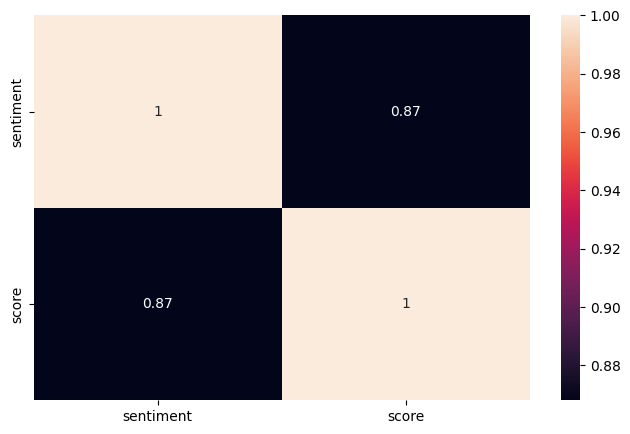

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#heatmap
numeric_col = df_sentiment.select_dtypes(include = ['int64','float64'])
plt.figure(figsize = (8,5))
corr = numeric_col.corr(numeric_only = True)
sns.heatmap(corr,annot = True)
plt.show()

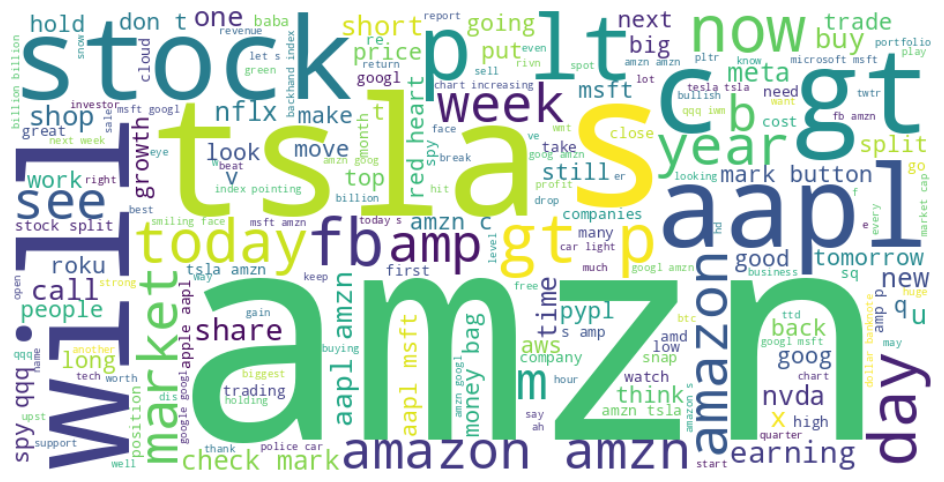

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df_sentiment['Tweet']))

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_sentiment['Date'] = pd.to_datetime(df_sentiment['Date'])

In [ ]:
columns_to_drop = ['Stock Name', 'Company Name']
existing_columns = [col for col in columns_to_drop if col in df_sentiment.columns]

if existing_columns:
    df_sentiment = df_sentiment.drop(columns=existing_columns)
else:
    print(f"Columns {columns_to_drop} already dropped or do not exist.")

In [ ]:
df_sentiment.head(3)

,Date,Tweet,sentiment,score
52439,2021-09-30 01:59:22+00:00,shopify is now of us e commerce it really was ...,0.5809,1
52438,2021-09-30 17:56:14+00:00,great snapshot of what it looks like when an i...,0.9369,1
52437,2021-09-30 18:01:19+00:00,returns over the last years bitcoin btc tesla ...,-0.2263,-1


In [ ]:
df = df.sort_values('Date')

In [ ]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [ ]:
#information of stock price dataset
df.info()
# data description
print(df.describe())
#  duplicates present in dataset
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        6300 non-null   object 
 1   Open        6300 non-null   float64
 2   High        6300 non-null   float64
 3   Low         6300 non-null   float64
 4   Close       6300 non-null   float64
 5   Adj Close   6300 non-null   float64
 6   Volume      6300 non-null   int64  
 7   Stock Name  6300 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 443.0+ KB
              Open         High          Low        Close    Adj Close  \
count  6300.000000  6300.000000  6300.000000  6300.000000  6300.000000   
mean    174.748195   177.594589   171.734715   174.657624   173.756012   
std     134.989675   136.795419   133.049955   134.949601   134.582934   
min      11.050000    11.210000    10.610000    11.060000    10.837500   
25%      78.170002    79.891003    76.792501    78.1100

np.int64(0)

In [ ]:
# missing values
missing_value = df.isnull().sum()
if missing_value.sum()>1:
     print("missing values are present")
else:
     print("missing values are not present")

missing values are not present


In [ ]:
numeric_col = df.select_dtypes(include = ['float64','int64'])
print(numeric_col.head())

            Open        High         Low       Close   Adj Close    Volume
0     260.333344  263.043335  258.333344  258.493347  258.493347  53868000
252   285.709991  287.829987  281.619995  281.920013  278.792847  32343600
1008  165.800003  166.392502  163.699493  164.251999  164.251999  56848000
5292  150.190002  151.729996  148.000000  149.970001  149.970001   1904500
5796  260.410004  263.519989  258.299988  262.220001  262.220001   1355300


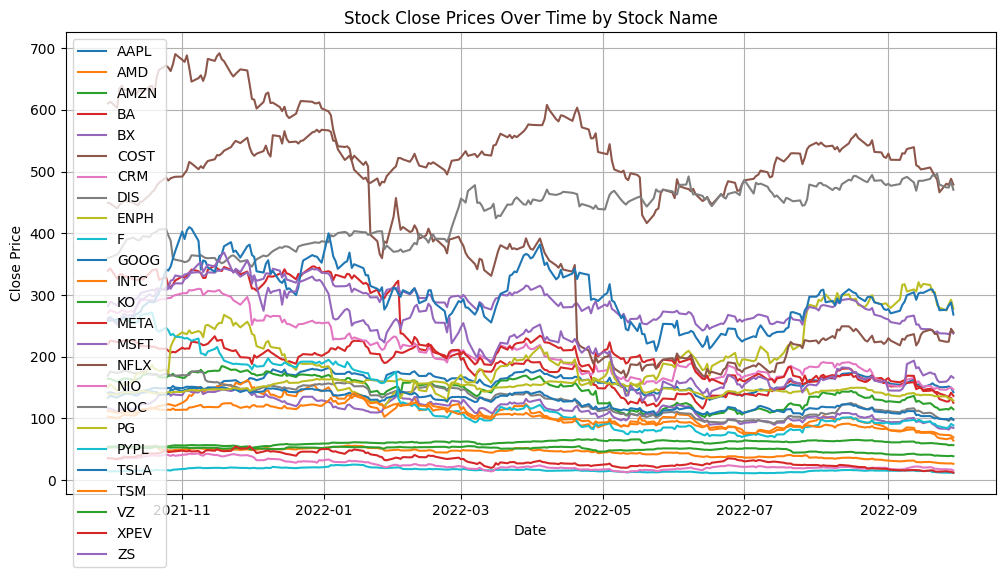

In [ ]:
plt.figure(figsize=(12, 6))
for stock_name, group in df.groupby('Stock Name'):
    plt.plot(group['Date'], group['Close'], label=stock_name)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Prices Over Time by Stock Name')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

stock_name = 'AMZN'
df = df[df['Stock Name'] == stock_name]

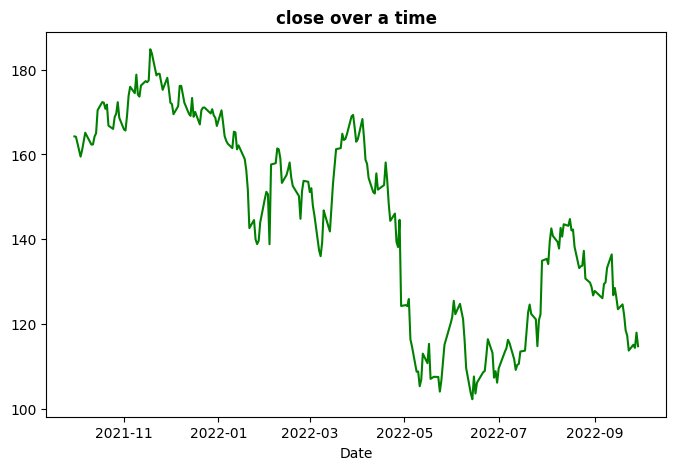

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(df['Date'],df['Close'],color = 'green')
plt.xlabel('Date')
plt.title("close over a time", weight= 'bold')
plt.show()

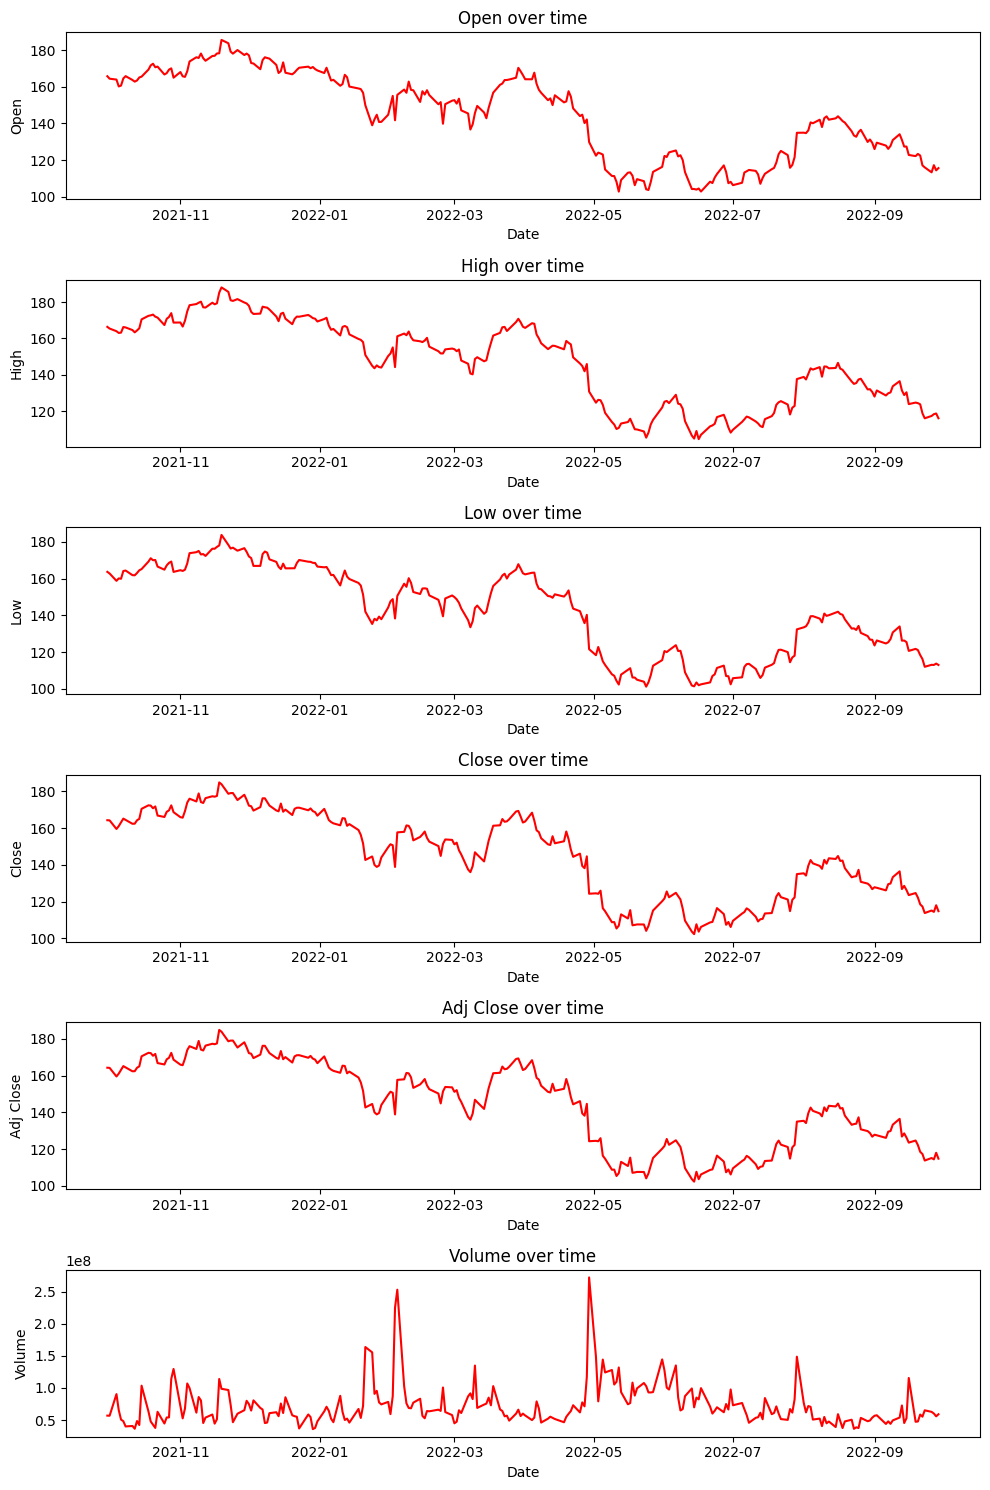

In [ ]:
plt.figure(figsize=(10, 15))
for idx, col in enumerate(numeric_col.columns):
     plt.subplot(len(numeric_col.columns), 1, idx + 1)
     plt.plot(df['Date'], df[col], color='red')
     plt.title(f'{col} over time')
     plt.xlabel('Date')
     plt.ylabel(col)
plt.tight_layout()
plt.show()

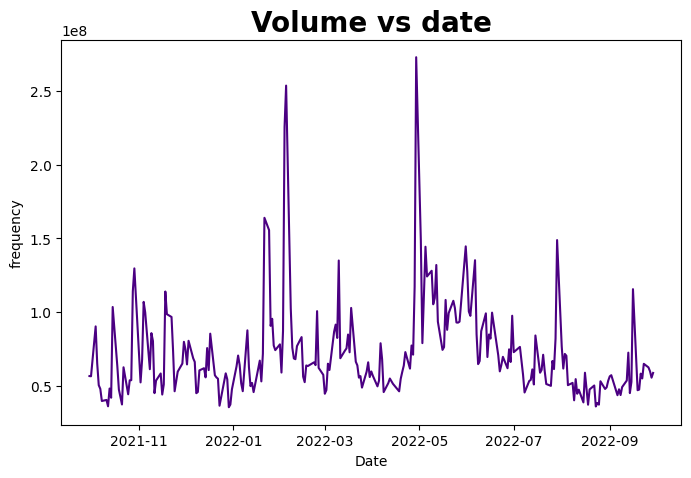

In [ ]:

plt.figure(figsize = (8,5))
plt.plot(df['Date'],df['Volume'],color = 'indigo')
plt.xlabel('Date')
plt.ylabel('frequency')
plt.title('Volume vs date',fontsize =20, weight= 'bold')
plt.show()

In [ ]:
df_sentiment['Date'] = pd.to_datetime(df_sentiment['Date']).dt.date
print("Date column in df_sentiment converted to date-only format.")

Date column in df_sentiment converted to date-only format.


In [ ]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
print("Date column in df converted to date-only format.")

Date column in df converted to date-only format.


In [ ]:


# Daily sentiment average
daily_sentiment =df_sentiment.groupby('Date')['sentiment'].mean().reset_index()
daily_sentiment.head()

,Date,sentiment
0,2021-09-30,0.244260
1,2021-10-01,0.436450
2,2021-10-02,0.078867
3,2021-10-03,0.822500
4,2021-10-04,0.268992


In [ ]:
merged_df = pd.merge(df, daily_sentiment, on='Date', how='inner')
print("DataFrames merged successfully. Displaying head of merged_df:")
merged_df.head()

DataFrames merged successfully. Displaying head of merged_df:


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,sentiment
0,2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,AMZN,0.244260
1,2021-10-01,164.450500,165.458496,162.796997,164.162994,164.162994,56712000,AMZN,0.436450
2,2021-10-04,163.969498,163.999496,158.812500,159.488998,159.488998,90462000,AMZN,0.268992
3,2021-10-05,160.225006,163.036499,160.123001,161.050003,161.050003,65384000,AMZN,0.166567
4,2021-10-06,160.676498,163.216995,159.931000,163.100494,163.100494,50660000,AMZN,0.275929


In [ ]:
merged_df = merged_df.sort_values(by='Date')

In [ ]:
merged_df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Stock Name,0
sentiment,0


In [ ]:
merged_df.duplicated().sum()

np.int64(0)

In [ ]:
merged_df = merged_df.drop_duplicates().reset_index(drop=True)

In [ ]:
merged_df.duplicated().sum()

np.int64(0)

In [ ]:

import numpy as np
numeric_cols = merged_df.select_dtypes(include= [np.number])

<Axes: >

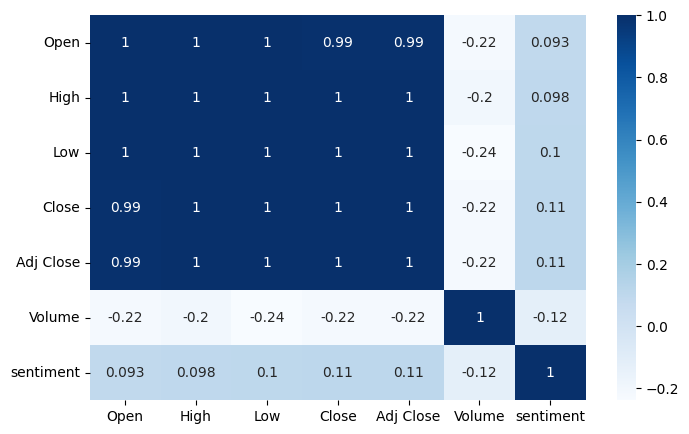

In [ ]:
#heatmap
plt.figure(figsize = (8,5))
corr = merged_df.corr(numeric_only = True)
sns.heatmap(corr,annot = True,cmap = 'Blues')

In [ ]:
lookback = 20
print(f"Lookback period defined as: {lookback}")

Lookback period defined as: 20


In [ ]:
new_df = merged_df[['Close', 'sentiment']]
print("New DataFrame 'new_df' created successfully. Displaying head:")
new_df.drop_duplicates(inplace = True)

New DataFrame 'new_df' created successfully. Displaying head:


/tmp/ipython-input-528382903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop_duplicates(inplace = True)


In [ ]:
training_data_len = int(len(new_df) * 0.8)
train_df = new_df[:training_data_len]
test_df = new_df[training_data_len:]

print(f"Training set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}")
print("Displaying head of train_df:")
display(train_df.head())
print("Displaying head of test_df:")
display(test_df.head())

Training set shape: (201, 2)
Testing set shape: (51, 2)
Displaying head of train_df:


,Close,sentiment
0,164.251999,0.244260
1,164.162994,0.436450
2,159.488998,0.268992
3,161.050003,0.166567
4,163.100494,0.275929


Displaying head of test_df:


,Close,sentiment
201,122.769997,0.426767
202,124.629997,0.325219
203,122.419998,0.054350
204,121.139999,0.266991
205,114.809998,-0.029779


In [ ]:
import numpy as np

def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:(i + lookback)])
        y.append(data[i + lookback, 0]) # Assuming 'Close' is the first column (index 0)
    return np.array(X), np.array(y)

print("create_sequences function defined.")

create_sequences function defined.


In [ ]:
X_train, y_train = create_sequences(train_df.values, lookback)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("First 5 elements of y_train:")
print(y_train[:5])

X_train shape: (181, 20, 2)
y_train shape: (181,)
First 5 elements of y_train:
[172.32850647 168.62150574 165.90550232 165.63749695 169.19999695]


In [ ]:
X_test, y_test = create_sequences(test_df.values, lookback)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate separate scalers for 'Close' price and 'sentiment'
close_scaler = MinMaxScaler(feature_range=(0, 1))
sentiment_scaler = MinMaxScaler(feature_range=(0, 1))

# Scale 'Close' price data
scaled_close_train = close_scaler.fit_transform(train_df[['Close']])
scaled_close_test = close_scaler.transform(test_df[['Close']])

# Scale 'sentiment' data
scaled_sent_train = sentiment_scaler.fit_transform(train_df[['sentiment']])
scaled_sent_test = sentiment_scaler.transform(test_df[['sentiment']])

print("First 5 elements of scaled_close_train:")
print(scaled_close_train[:5])
print("\nFirst 5 elements of scaled_sent_train:")
print(scaled_sent_train[:5])

First 5 elements of scaled_close_train:
[[0.75087588]
 [0.74979695]
 [0.69313764]
 [0.71206052]
 [0.73691707]]

First 5 elements of scaled_sent_train:
[[0.64851792]
 [0.77799111]
 [0.66517897]
 [0.59617803]
 [0.66985218]]


In [ ]:
import numpy as np

# Creating scaled training data by horizontally stacking scaled_close_train and scaled_sent_train
scaled_train_data = np.hstack((scaled_close_train, scaled_sent_train))

# Creating scaled testing data by horizontally stacking scaled_close_test and scaled_sent_test
scaled_test_data = np.hstack((scaled_close_test, scaled_sent_test))

print("Scaled training data created. First 5 rows:")
print(scaled_train_data[:5])
print("\nScaled testing data created. First 5 rows:")
print(scaled_test_data[:5])

Scaled training data created. First 5 rows:
[[0.75087588 0.64851792]
 [0.74979695 0.77799111]
 [0.69313764 0.66517897]
 [0.71206052 0.59617803]
 [0.73691707 0.66985218]]

Scaled testing data created. First 5 rows:
[[0.24802104 0.77146771]
 [0.27056842 0.70305763]
 [0.24377828 0.52058071]
 [0.22826182 0.66383112]
 [0.15152802 0.46390532]]


In [ ]:
X_train_scaled, y_train_scaled = create_sequences(scaled_train_data, lookback)
X_test_scaled, y_test_scaled = create_sequences(scaled_test_data, lookback)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train_scaled shape: {y_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_test_scaled shape: {y_test_scaled.shape}")

print("\nFirst 5 elements of X_train_scaled:")
print(X_train_scaled[:5])
print("\nFirst 5 elements of y_train_scaled:")
print(y_train_scaled[:5])

X_train_scaled shape: (181, 20, 2)
y_train_scaled shape: (181,)
X_test_scaled shape: (31, 20, 2)
y_test_scaled shape: (31,)

First 5 elements of X_train_scaled:
[[[0.75087588 0.64851792]
  [0.74979695 0.77799111]
  [0.69313764 0.66517897]
  [0.71206052 0.59617803]
  [0.73691707 0.66985218]
  [0.76141625 0.7117017 ]
  [0.75304577 0.7588588 ]
  [0.72739514 0.        ]
  [0.72801942 0.65007507]
  [0.75041531 0.55904743]
  [0.75985843 0.77080901]
  [0.82602172 0.54055511]
  [0.84888428 0.52549371]
  [0.84731444 0.67817805]
  [0.82968266 0.57138687]
  [0.84177456 0.40114974]
  [0.78149057 0.50451922]
  [0.77228976 0.50661162]
  [0.80605024 0.62711365]
  [0.81600259 0.64031764]]

 [[0.74979695 0.77799111]
  [0.69313764 0.66517897]
  [0.71206052 0.59617803]
  [0.73691707 0.66985218]
  [0.76141625 0.7117017 ]
  [0.75304577 0.7588588 ]
  [0.72739514 0.        ]
  [0.72801942 0.65007507]
  [0.75041531 0.55904743]
  [0.75985843 0.77080901]
  [0.82602172 0.54055511]
  [0.84888428 0.52549371]
  [0.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

model = Sequential()


model.add(Input(shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("LSTM model architecture defined and compiled.")
model.summary()

LSTM model architecture defined and compiled.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 20, 50)         │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, verbose=1)
print("Model training completed.")

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2824
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0723
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0491
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0318
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0208
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0261
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0184
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0186
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0211
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0163
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0197
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0190
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0180
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0192
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0175
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions to original scale
predicted_close = close_scaler.inverse_transform(pred_scaled)

# Inverse transform the actual y_test_scaled values
actual_close = close_scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

# Calculate evaluation metrics
mse = mean_squared_error(actual_close, predicted_close)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_close, predicted_close)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
Mean Squared Error (MSE): 21.555255807825418
Root Mean Squared Error (RMSE): 4.642763811333225
Mean Absolute Error (MAE): 3.876641796481225
